#  Clustering neighbourhoods in Buenos Aires City

## Coursera Capstone project

### IBM Data Science professional Certificate

#### *By Tomas Leake*

![Image](https://www.bain.com/contentassets/f68751a8708848558d763e7fe458c10a/local-office-images-buenos-aires--1950x650.jpg)

# Introduction:
  
  Buenos Aires is the capital of Argentina, and has a population of 2.89 million people (according to 2010 national census). Dispite being one of the main concentrations of wealth in Argentina and Latin Amerrica, economic inequality is high. However, to a visiting tourist, it ls likely they will not be exposed to the poorer areas of the city doe to the distribution of the neighbourhoods relative to the main attractions the city haas to offer. 
  
  The aim of this study is to perform a brief overview of the neighbourhoods of Buenos Aires, by analyzing publicly available geographic and economic data, and clustering neighbourhoods based on their most numerous type of venues.  (note, the scope  of this study only includes neighbourhoods within the Autonomous city of Buenos Aires, not the adjacent surrounding cities of the Province of Buenos Aires)
  
  For this study i will be using Exploratory Data Analysis (EDA) to uncover hidden properties in the data, with an aim to give the reader a basic overview about the economy, characteristics and distribution of Buenos Aires 48 neighbourhoods.

  Before reading, the reader should note i kept the local terminology for Neighbourhoods and Boroughs: "Barrio" and "Comuna" respectively. The different Comunas of the city of Buenos Aires are identified by numbers, from 1 to 15.



First of all, we import all the necessary python libraries 

In [1]:
import numpy as np

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import json

from bs4 import BeautifulSoup

from geopy.extra.rate_limiter import RateLimiter

from time import sleep

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [94]:
import matplotlib.pyplot as plt

In [109]:
from urllib.request import urlopen


In [128]:
from IPython.display import Image
from IPython.core.display import HTML 

# Data

The Government of the city of Buenos Aires hosts public data on the following website: 

https://data.buenosaires.gob.ar/dataset

In this case the main datasets we are interested are:

- Barrios and Comunas of Buenos Aires city
- Average household income per Comuna
- Geographic outline for each Barrio (GeoJSON)

Also, in order to search for venues within the vicinity of each barrio, its convenient to work with specific location points for each one and explore within a certain radius. For this we shall geocode the latitude and longitude of each Barrio through Nominatim.

The nearby venues will be obtained through the FourSquare API.

In the following cells I show how the data was downloaded and processed.





## Buenos Aires neighbourhoods (barrios) and boroughs (comunas)

In [11]:
Barrios_BuenosAires_url='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.csv'
Barrios_BuenosAires=pd.read_csv(Barrios_BuenosAires_url)
print('Shape:',Barrios_BuenosAires.shape)
Barrios_BuenosAires


Shape: (48, 5)


,WKT,barrio,comuna,perimetro,area
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15,7724.852955,3.115707e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15,8131.857075,3.615978e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5,8537.901368,4.050752e+06
5,"POLYGON ((-58.4306058283309 -34.6070470885963,...",CABALLITO,6,10990.964471,6.851029e+06
6,"POLYGON ((-58.4819203599833 -34.6242871724757,...",VILLA SANTA RITA,11,5757.752335,2.153691e+06
7,"POLYGON ((-58.5034920611534 -34.6240324216321,...",MONTE CASTRO,10,7361.036418,2.627481e+06
8,"POLYGON ((-58.525116079791 -34.613999981063,-5...",VILLA REAL,10,5070.965652,1.334146e+06
9,"POLYGON ((-58.4604133778842 -34.6567978457031,...",FLORES,7,15772.439510,8.590784e+06


In [15]:
Barrios_BuenosAires.dtypes

Barrio    object
Comuna     int64
dtype: object

The Barrios_BuenosAires dataframe contains data for 48 Barrios in Buenos aires. Besides Barrio names, the only other column we shall keep from this dadtaset is "comuna" which details the comuna (Borough) each Barrio is in. 

In [12]:
#Edit column names so they start with capital letters (the last 2 columns will be dropped in the next step)
Barrios_BuenosAires.rename(columns={'comuna':'Comuna','barrio':'Barrio'}, inplace=True)

#Drop the unnecessary columns 
Barrios_BuenosAires=Barrios_BuenosAires.drop(columns=['WKT','perimetro','area'])

#Complete the abreviation "GRAL." for "GENERAL" in VILLA GENERAL MITRE, in order to avoid problems later on when geocoding the neighbourhoods
Barrios_BuenosAires.replace('VILLA GRAL. MITRE','VILLA GENERAL MITRE',inplace=True)
Barrios_BuenosAires.head()

Barrios_BuenosAires.head()

,Barrio,Comuna
0,CHACARITA,15
1,PATERNAL,15
2,VILLA CRESPO,15
3,VILLA DEL PARQUE,11
4,ALMAGRO,5


### Average household income per Comuna

For convenience, I have downloaded the average Income per capita dataset I worked with in .csv format. It can be found at:

https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2018/05/MT_eah_2417.xlsx

Note: this is the computed average from 2019. Inflation in Argentina that year was 53.8%, and at the time of writing continues to rise. For the sake of simplicity we shall consider these values as current. It is also unlikely that relative differences in income between boroughs has changed significantly since then, which is more important forthe purposes of this study.

In [46]:
#First, Income per capita for each Borough (Comuna)
IPC_csv_loc = 'C:/Users/Terminal/Documents/Coursera/Capstone Project/BuenosAires Data/Ingreso Per Capita por Comunas_Buenos Aires.csv'
IPC_Comuna = pd.read_csv(IPC_csv_loc)
IPC_Comuna

,Comuna,Promedio IPCF
0,1,"$ 35,606"
1,2,"$ 48,847"
2,3,"$ 28,074"
3,4,"$ 21,631"
4,5,"$ 33,454"
5,6,"$ 39,050"
6,7,"$ 27,210"
7,8,"$ 15,187"
8,9,"$ 23,131"
9,10,"$ 27,730"


In [47]:
IPC_Comuna.dtypes

Comuna            int64
Promedio IPCF    object
dtype: object

In [48]:
# we change 'Comuna' type to integer, as this is the type used in the Barrios_BuenosAires dataset
IPC_Comuna['Comuna']=IPC_Comuna['Comuna'].astype(int)
#Also, we eliminate the '$' sign from 'Promedio IPCF' column  and also convert it to integer
IPC_Comuna['Promedio IPCF']=IPC_Comuna['Promedio IPCF'].str.replace('$','')
IPC_Comuna['Promedio IPCF']=IPC_Comuna['Promedio IPCF'].str.replace(',','').astype(float)
IPC_Comuna.head()

,Comuna,Promedio IPCF
0,1,35606.0
1,2,48847.0
2,3,28074.0
3,4,21631.0
4,5,33454.0


In [49]:
IPC_Comuna.rename(columns={'Promedio IPCF':'Avg. household income [ARS$]'}, inplace=True)
IPC_Comuna

,Comuna,Avg. household income [ARS$]
0,1,35606.0
1,2,48847.0
2,3,28074.0
3,4,21631.0
4,5,33454.0
5,6,39050.0
6,7,27210.0
7,8,15187.0
8,9,23131.0
9,10,27730.0


Now we merge both tables into one dataset containing:
    - Barrio
    -Comuna
    -Average household income
    

In [50]:
#Merge both tables to include IPC data:

BuenosAiresData=pd.merge(Barrios_BuenosAires,IPC_Comuna, on='Comuna')
BuenosAiresData

,Barrio,Comuna,Avg. household income [ARS$]
0,CHACARITA,15,35033.0
1,PATERNAL,15,35033.0
2,VILLA CRESPO,15,35033.0
3,PARQUE CHAS,15,35033.0
4,AGRONOMIA,15,35033.0
5,VILLA ORTUZAR,15,35033.0
6,VILLA DEL PARQUE,11,29353.0
7,VILLA SANTA RITA,11,29353.0
8,VILLA GENERAL MITRE,11,29353.0
9,VILLA DEVOTO,11,29353.0


### Barrio  locations

Later on we will use the FourSquare API to obtain data on different venues within a certain radius of each Barrio. 
To do this we will get the corresponding latitude and longitude for each barrio by geocoding through Nominatim. In order to avoid saturating the Nominatim API with too many calls per second, we apply the sleep() function and delay each loop by a second. 

For convenience, after running the code once and obtaining the neccesary data, i saved the output to a CSV file, and commented out the original code.

In [38]:

#BarrioLocations=[]

## Iterate through Barrio names and find corresponding latitude and longitude
#for barrio in BuenosAiresData['Barrio']:
    
    #BAbarrio = barrio + ', Buenos Aires'
    #geolocator = Nominatim(user_agent="BarrioLocation")
    #location = geolocator.geocode(BAbarrio)
    
    #BAbarrioLatitude = location.latitude
    #BAbarrioLongitude = location.longitude
    
    #BarrioLocations.append((barrio,BAbarrioLatitude,BAbarrioLongitude))
    
    ##we apply the sleep function in order to not saturate the OpenStreetMap service through nominatim 
    #sleep(1)
    
#BarrioLocations

Now we convert the list into a dataframe and merge it to the original BuenosAiresData dataframe:

In [39]:
#BarriosLoc=pd.DataFrame(BarrioLocations)
#BarriosLoc.columns=['Barrio','Latitude','Longitude']
#Barrios=pd.merge(BuenosAiresData,BarriosLoc,on='Barrio')
#Barrios

In [40]:
#Barrios.to_csv(r'C:\Users\Terminal\Documents\Coursera\Capstone Project\BuenosAires Data\BuenosAiresData.csv', index = False)

In [59]:
BuenosAiresData_csv_loc = 'C:/Users/Terminal/Documents/Coursera/Capstone Project/BuenosAires Data/BuenosAiresData.csv'
BuenosAiresData = pd.read_csv(BuenosAiresData_csv_loc)
BuenosAiresData=BuenosAiresData.drop(columns=['Territory'])
BuenosAiresData

,Barrio,Comuna,Avg. household income [ARS$],Latitude,Longitude
0,CHACARITA,15,35033.0,-34.588011,-58.454156
1,PATERNAL,15,35033.0,-34.597740,-58.470199
2,VILLA CRESPO,15,35033.0,-34.598395,-58.442474
3,PARQUE CHAS,15,35033.0,-34.585511,-58.479305
4,AGRONOMIA,15,35033.0,-34.591516,-58.485385
5,VILLA ORTUZAR,15,35033.0,-34.581302,-58.468245
6,VILLA DEL PARQUE,11,29353.0,-34.604797,-58.493821
7,VILLA SANTA RITA,11,29353.0,-34.616078,-58.482742
8,VILLA GENERAL MITRE,11,29353.0,-34.610310,-58.469314
9,VILLA DEVOTO,11,29353.0,-34.600994,-58.515516


To check if the location data is correct, we can visualize the neighbourhoods in Buenos Aires on a folium map. First, we create a map centred on the Coordinates of Buenos Aires (Thankyou Nominatim) then we add markers reresenting each Barrio and Comuna.

In [55]:
# create map of Buenos Aires using latitude and longitude values

address = 'Buenos Aires'
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)

BAlatitude = location.latitude
BAlongitude = location.longitude

print('Latitude and longitude of Buenos Aires city:')
print('latitude',BAlatitude) 
print('longitude',BAlongitude)

Barrios_map = folium.Map(location=[BAlatitude, BAlongitude], zoom_start=12)

Latitude and longitude of Buenos Aires city:
latitude -34.6075682
longitude -58.4370894


In [63]:
#Locate Neighbourhoods on Buenos Aires Map

# add markers to map
for lat, lng, comuna, barrio in zip(BuenosAiresData['Latitude'], BuenosAiresData['Longitude'], BuenosAiresData['Comuna'], BuenosAiresData['Barrio']):
    label = '{}, {}'.format(barrio, comuna)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Barrios_map)  
    
Barrios_map

## Exploring nearby venues with the Foursquare API

Now we have the geographic location for all the neighbourhoods in Buenos Aires City, we can search nearby venues for ech one within a certain radius. in this case we shall search for the top venues according to FourSquare within 800m

In [64]:
CLIENT_ID = 'WD0HB4YZWDPF1I4OHH5UFHGPTRBR01PS4VWZOLHBFD4JOMUN' 
CLIENT_SECRET = 'RB3MHYRUBGZZVGZCSDM0ETR4OKAVZVGI03R5KEPW5NYLZQD4' 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WD0HB4YZWDPF1I4OHH5UFHGPTRBR01PS4VWZOLHBFD4JOMUN
CLIENT_SECRET:RB3MHYRUBGZZVGZCSDM0ETR4OKAVZVGI03R5KEPW5NYLZQD4


In [66]:
#Function to get top 100 venues within 800m of a given neighbourhood location
radius = 800
LIMIT = 100

#Define a list to store venue data from FourSquare
venues = []

#zip through all the roughs in the Barrios dataframe, appending venue data to the Venue list
for lat, long, comuna, barrio in zip(BuenosAiresData['Latitude'], BuenosAiresData['Longitude'], BuenosAiresData['Comuna'], BuenosAiresData['Barrio']):
    
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append(( 
            comuna,
            barrio,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

Now we convert the venues list into a pandas dataframe:

In [67]:
# convert the venues list into a new DataFrame
BA_venues_df = pd.DataFrame(venues)

# define the column names
BA_venues_df.columns = ['Comuna', 'Barrio', 'Barrio Latitude', 'Barrio Longitude', 'Venue Name', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

print(BA_venues_df.shape)
BA_venues_df.head()

(2068, 8)


,Comuna,Barrio,Barrio Latitude,Barrio Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,15,CHACARITA,-34.588011,-58.454156,El Imperio de la Pizza,-34.586890,-58.454967,Pizza Place
1,15,CHACARITA,-34.588011,-58.454156,Sede Central de Whisky,-34.586750,-58.450596,Whisky Bar
2,15,CHACARITA,-34.588011,-58.454156,Fábrica de Churros Olleros,-34.586983,-58.453640,Bakery
3,15,CHACARITA,-34.588011,-58.454156,Santos 4040,-34.588822,-58.449863,Theater
4,15,CHACARITA,-34.588011,-58.454156,Donnet,-34.588333,-58.450745,Vegetarian / Vegan Restaurant


We now have a list of 2068 of the top venues within the neighbourhoods of buenos aires. Now we'll check how many venues were returned for each neighbourhood:

In [68]:
#Check how many venues were returned by neighbourhood
BA_venues_count = BA_venues_df.groupby('Barrio').count()
BA_venues_count = BA_venues_count.filter(['Barrio','Venue Name'])
BA_venues_count = BA_venues_count.rename(columns={'Venue Name': 'Venues'})
BA_venues_count.sort_values(by=['Venues'])
BA_venues_count

,Venues
Barrio,
AGRONOMIA,16
ALMAGRO,75
BALVANERA,67
BARRACAS,6
BELGRANO,100
BOCA,54
BOEDO,31
CABALLITO,86
CHACARITA,51


We see only 3 neighbourhoods have 100 venues within their radius. Let's plot the distribution of top venues found by the FourSquare API to visualize the data we have found. First we'll merge the previous dataframe into BuenosAiresData.

In [81]:
BuenosAiresData=pd.merge(BuenosAiresData,BA_venues_count,on='Barrio')
BuenosAiresData.head()

,Barrio,Comuna,Avg. household income [ARS$],Latitude,Longitude,Venues
0,CHACARITA,15,35033.0,-34.588011,-58.454156,51
1,PATERNAL,15,35033.0,-34.597740,-58.470199,16
2,VILLA CRESPO,15,35033.0,-34.598395,-58.442474,78
3,PARQUE CHAS,15,35033.0,-34.585511,-58.479305,17
4,AGRONOMIA,15,35033.0,-34.591516,-58.485385,16


In [69]:
# one hot encoding
BA_onehot = pd.get_dummies(BA_venues_df[['Venue Category']], prefix="", prefix_sep="")

# add postal code, borough and neighborhood column back to dataframe
BA_onehot['Comuna'] = BA_venues_df['Comuna'] 
BA_onehot['Barrio'] = BA_venues_df['Barrio'] 

cols_to_move = ['Comuna','Barrio']
BA_onehot = BA_onehot[ cols_to_move + [ col for col in BA_onehot.columns if col not in cols_to_move ] ]

print(BA_onehot.shape)
BA_onehot.head()

(2068, 230)


,Comuna,Barrio,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Radio Station,Recording Studio,Recreation Center,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tunnel,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,15,CHACARITA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,CHACARITA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
BA_grouped = BA_onehot.groupby(['Comuna', 'Barrio']).mean().reset_index()
print(BA_grouped.shape)
BA_grouped

(48, 230)


,Comuna,Barrio,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Camera Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Radio Station,Recording Studio,Recreation Center,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tunnel,Used Bookstore,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,CONSTITUCION,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.033333,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.033333,0.000,0.000000,0.066667,0.00000

In [71]:
#Function to sort venues in ascending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
#create dataframe with top 10 venues for each barrio
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [107]:
Barrios_venues_sorted = pd.DataFrame(columns=columns)
Barrios_venues_sorted['Barrio'] = BA_grouped['Barrio']

for ind in np.arange(BA_grouped.shape[0]):
    Barrios_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BA_grouped.iloc[ind, :], num_top_venues)
    
Barrios_venues_sorted=pd.merge(Barrios_venues_sorted,BA_venues_count,on ='Barrio')
Barrios_venues_sorted.drop(columns=['Venues'],inplace=True)

Barrios_venues_sorted.head()

,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CONSTITUCION,Café,Bus Stop,Hotel,Soccer Field,German Restaurant,Pub,Shopping Plaza,Coffee Shop,Russian Restaurant,Cultural Center
1,MONSERRAT,Hotel,Spanish Restaurant,Café,Argentinian Restaurant,Coffee Shop,Hostel,Camera Store,Pizza Place,Italian Restaurant,Sandwich Place
2,PUERTO MADERO,Argentinian Restaurant,Coffee Shop,Hotel Bar,Hotel,Food Truck,Café,Park,Outdoor Sculpture,Gym,Italian Restaurant
3,RETIRO,Hotel,Coffee Shop,Café,Argentinian Restaurant,Italian Restaurant,Plaza,Ice Cream Shop,Sandwich Place,Cocktail Bar,Restaurant
4,SAN NICOLAS,Restaurant,Café,Other Great Outdoors,Comfort Food Restaurant,Supermarket,Park,Coffee Shop,Outdoors & Recreation,Hotel,Argentinian Restaurant


# Methodology and Analysis

Now we have gathered and pre-processed the data, we can start analyzing it. In this section, we cluster the different neighbourhoods based on the venues found through FourSquare, then we visualize and compare it to the data we obtained for average household income and ammount of venues found.

## K-means clustering

Before analyzing clusters, we apply the elbow method to determine the most idela number of clusters for our dataset.

In [95]:
BA_grouped_clustering = BA_grouped.drop(["Barrio"], 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(BA_grouped_clustering)
    distortions.append(kmeanModel.inertia_)


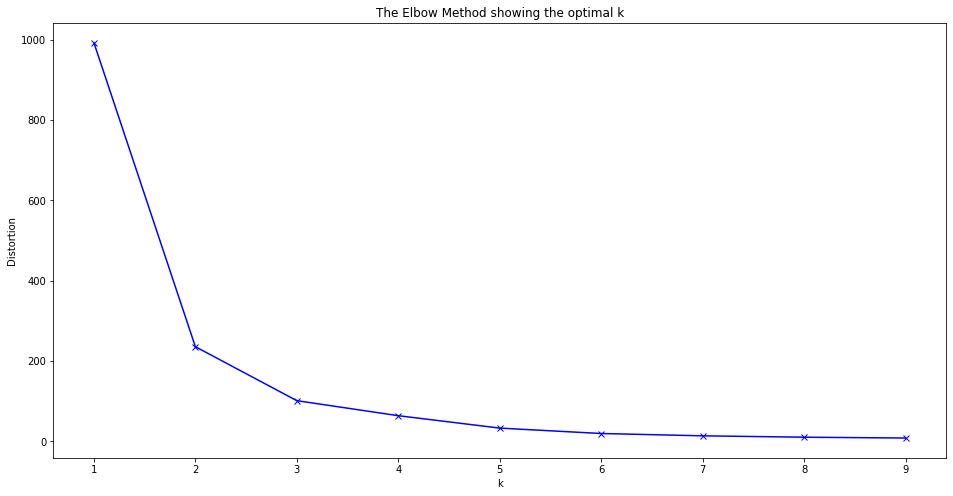

In [96]:
# Now we plot the resulting error for each value of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For our Study, we will choose K=4 clusters. Now we cluster the neighbourhoods and generate a list with the cluster labels the algorythm finds, to append to the Barrios_Venues_sorted dataframe. 

In [98]:
# set number of clusters
kclusters = 4

#BA_grouped_clustering = BA_grouped.drop(["Barrio"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [108]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
BA_merged = BuenosAiresData.copy()

# add clustering labels
BA_merged["Cluster Labels"] = kmeans.labels_

BA_merged = BA_merged.join(Barrios_venues_sorted.set_index('Barrio'), on='Barrio')

print(BA_merged.shape)
BA_merged 

(48, 17)


,Barrio,Comuna,Avg. household income [ARS$],Latitude,Longitude,Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHACARITA,15,35033.0,-34.588011,-58.454156,51,1,Café,Bakery,Pizza Place,Restaurant,Office,Bus Stop,Bar,Argentinian Restaurant,Theater,Vegetarian / Vegan Restaurant
1,PATERNAL,15,35033.0,-34.597740,-58.470199,16,1,Art Gallery,Stadium,Athletics & Sports,Deli / Bodega,Pizza Place,Bus Stop,Music Venue,Bookstore,Hardware Store,BBQ Joint
2,VILLA CRESPO,15,35033.0,-34.598395,-58.442474,78,1,Pizza Place,Café,Argentinian Restaurant,BBQ Joint,Ice Cream Shop,Bus Stop,Coffee Shop,Clothing Store,Dance Studio,Burger Joint
3,PARQUE CHAS,15,35033.0,-34.585511,-58.479305,17,1,Café,Pizza Place,Bakery,Bus Stop,Gym,Nightclub,Plaza,Gym / Fitness Center,Arts & Crafts Store,Tennis Court
4,AGRONOMIA,15,35033.0,-34.591516,-58.485385,16,1,Coffee Shop,Gym / Fitness Center,Tunnel,Sports Club,Soccer Field,Garden Center,Snack Place,Farmers Market,Grocery Store,BBQ Joint
5,VILLA ORTUZAR,15,35033.0,-34.581302,-58.468245,40,1,BBQ Joint,Pharmacy,Gym / Fitness Center,Bakery,Plaza,Restaurant,Café,Coffee Shop,Pizza Place,Women's Store
6,VILLA DEL PARQUE,11,29353.0,-34.604797,-58.493821,36,1,Ice Cream Shop,Café,Pharmacy,Italian Restaurant,Argentinian Restaurant,Gym,Restaurant,Soccer Field,Big Box Store,Gastropub
7,VILLA SANTA RITA,11,29353.0,-34.616078,-58.482742,11,1,Ice Cream Shop,Pizza Place,Cheese Shop,Shop & Service,Gym,Sports Club,Pharmacy,College Football Field,Café,BBQ Joint
8,VILLA GENERAL MITRE,11,29353.0,-34.610310,-58.469314,22,1,Ice Cream Shop,Italian Restaurant,Restaurant,Outdoor Sculpture,Music Venue,Breakfast Spot,Burger Joint,Bus Stop,Soccer Stadium,Park
9,VILLA DEVOTO,11,29353.0,-34.600994,-58.515516,53,1,Coffee Shop,Ice Cream Shop,Beer Bar,Café,Pharmacy,Bagel Shop,Restaurant,Bistro,Train Station,Italian Restaurant


So, now we have a very complete dataset that includes:
- Barrio/Comuna
- Average household income
- geographic location
- Number of venues in vicinity found on Foursquare 
- Cluster labels
- 10 most common venues in vicinity


## Results

Now we visualize, compare and analyze the data we have worked on. 

### Average Income per Comuna

First of all, we create a choropleth map of Average household income vs Comunas, to get an idea of wealth distribution within the city of Buenos Aires. For this, we use a JSON file containing the geographic shape for each Barrio. 

In [110]:
with urlopen('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson') as response:
    GeoComunas = json.load(response)

In [112]:
Income_map=folium.Map(location=[BAlatitude, BAlongitude], zoom_start=12)


Income_map.choropleth(
    geo_data=GeoComunas,
    data=BA_merged,
    columns=['Comuna', 'Avg. household income [ARS$]'],
    key_on='feature.properties.comuna',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average family income'
)

# display map
Income_map

We can clearly see from this map the most affluent Barrios are concentrated in the Northeastern side of the city, with the average income decreasing towards the south. 

### Venues per neighbourhood

In [113]:
#create a clean map of Buenos Aires 
Venue_concentration_map = folium.Map(location=[BAlatitude, BAlongitude], zoom_start=12)

for lat, lng, venues, barrio in zip(BuenosAiresData['Latitude'], BuenosAiresData['Longitude'], BuenosAiresData['Venues'], BuenosAiresData['Barrio']):
    Vlabel = '{}, {}'.format(barrio, venues)
    Vlabel = folium.Popup(Vlabel, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=venues*0.2,
        popup=Vlabel,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Venue_concentration_map) 
    
# display map
Venue_concentration_map

Here we can see that more venues were found by FourSquare for the richer neighbourhoods up North than for the poorer neighbourhoods down South. This doesnt necessarily mean there are less venues in the poorer neighbourhoods, but it is more likely that a venue within a richer neighbourhood will show up on FourSquares database. 

### Barrio Clusters

In [116]:
map_clusters = folium.Map(location=[BAlatitude, BAlongitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, comuna, poi, cluster in zip(BA_merged['Latitude'], BA_merged['Longitude'], BA_merged['Comuna'], BA_merged['Barrio'], BA_merged['Cluster Labels']):
    label = folium.Popup('{} : {} - Cluster {}'.format(comuna, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

At first glance, the clusters 0, 1 and 3 (red and purple and green(ish) roughly correspond to different income levels observed in the first map. Cluster 0 does have one outlier, suprisingly in one of the lowest income neighbourhoods of the city, though from the previous map we can see that Villa Soldati only has 4 Venues.

The eastern coast of the city, in an area roughly between the barrios Retiro and Constitucion houses many commercial, government and financial office buildings, and is the destination for many commuters from both the city and province of Buenos Aires, so it makes sense it is largely in a separate cluster (2 - blue). Again, the fact that the 5 neighbourhoods in the poorer southwest of the city have been grouped into the same cluster is probably due to the very low number of venues registered on FourSquare in that area.

Let us study each cluster and try to see the reasons behind their grouping.

In [117]:
BA_merged.loc[BA_merged['Cluster Labels'] == 0, BA_merged.columns[[0] + list(range(5, BA_merged.shape[1]))]]

,Barrio,Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,VILLA SOLDATI,4,0,Bus Stop,Soccer Stadium,Fabric Shop,Clothing Store,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food Service,Food & Drink Shop
39,SAAVEDRA,51,0,Ice Cream Shop,Coffee Shop,Restaurant,Sporting Goods Shop,Tea Room,Bus Stop,Bakery,Bookstore,Argentinian Restaurant,Electronics Store
40,COGHLAN,37,0,Argentinian Restaurant,Pizza Place,Plaza,BBQ Joint,Bakery,Beer Bar,Gym / Fitness Center,Brewery,Café,Food Service
41,VILLA URQUIZA,74,0,Ice Cream Shop,Pizza Place,Bakery,Café,Coffee Shop,Argentinian Restaurant,Italian Restaurant,Convenience Store,Electronics Store,Soccer Field
42,VILLA PUEYRREDON,24,0,Ice Cream Shop,Bus Stop,BBQ Joint,Plaza,Argentinian Restaurant,Pizza Place,Electronics Store,Pharmacy,Fast Food Restaurant,Soccer Field
43,COLEGIALES,80,0,Argentinian Restaurant,Bakery,Café,Pizza Place,Coffee Shop,Brewery,Restaurant,Bar,Beer Bar,Gay Bar
44,BELGRANO,100,0,Café,Coffee Shop,Chinese Restaurant,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Dessert Shop,Vegetarian / Vegan Restaurant,Deli / Bodega,Bakery
45,NUÑEZ,79,0,BBQ Joint,Restaurant,Pizza Place,Coffee Shop,Gym,Soccer Field,Tennis Court,Deli / Bodega,Ice Cream Shop,Brewery
46,PALERMO,87,0,Argentinian Restaurant,Hotel,Bakery,Gym / Fitness Center,Sushi Restaurant,Wine Shop,Café,Deli / Bodega,Ice Cream Shop,Supermarket
47,RECOLETA,100,0,Hotel,Ice Cream Shop,Plaza,Bakery,Italian Restaurant,Argentinian Restaurant,Tea Room,Deli / Bodega,Coffee Shop,Café


In [118]:
BA_merged.loc[BA_merged['Cluster Labels'] == 1, BA_merged.columns[[0] + list(range(5, BA_merged.shape[1]))]]

,Barrio,Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHACARITA,51,1,Café,Bakery,Pizza Place,Restaurant,Office,Bus Stop,Bar,Argentinian Restaurant,Theater,Vegetarian / Vegan Restaurant
1,PATERNAL,16,1,Art Gallery,Stadium,Athletics & Sports,Deli / Bodega,Pizza Place,Bus Stop,Music Venue,Bookstore,Hardware Store,BBQ Joint
2,VILLA CRESPO,78,1,Pizza Place,Café,Argentinian Restaurant,BBQ Joint,Ice Cream Shop,Bus Stop,Coffee Shop,Clothing Store,Dance Studio,Burger Joint
3,PARQUE CHAS,17,1,Café,Pizza Place,Bakery,Bus Stop,Gym,Nightclub,Plaza,Gym / Fitness Center,Arts & Crafts Store,Tennis Court
4,AGRONOMIA,16,1,Coffee Shop,Gym / Fitness Center,Tunnel,Sports Club,Soccer Field,Garden Center,Snack Place,Farmers Market,Grocery Store,BBQ Joint
5,VILLA ORTUZAR,40,1,BBQ Joint,Pharmacy,Gym / Fitness Center,Bakery,Plaza,Restaurant,Café,Coffee Shop,Pizza Place,Women's Store
6,VILLA DEL PARQUE,36,1,Ice Cream Shop,Café,Pharmacy,Italian Restaurant,Argentinian Restaurant,Gym,Restaurant,Soccer Field,Big Box Store,Gastropub
7,VILLA SANTA RITA,11,1,Ice Cream Shop,Pizza Place,Cheese Shop,Shop & Service,Gym,Sports Club,Pharmacy,College Football Field,Café,BBQ Joint
8,VILLA GENERAL MITRE,22,1,Ice Cream Shop,Italian Restaurant,Restaurant,Outdoor Sculpture,Music Venue,Breakfast Spot,Burger Joint,Bus Stop,Soccer Stadium,Park
9,VILLA DEVOTO,53,1,Coffee Shop,Ice Cream Shop,Beer Bar,Café,Pharmacy,Bagel Shop,Restaurant,Bistro,Train Station,Italian Restaurant


In [127]:
BA_merged.loc[BA_merged['Cluster Labels'] == 2, BA_merged.columns[[0] + list(range(5, BA_merged.shape[1]))]].sort_values('Venues')

,Barrio,Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,BARRACAS,6,2,Grocery Store,Train Station,Auto Workshop,Park,Athletics & Sports,Flower Shop,Yoga Studio,Fish Market,Flea Market,Fondue Restaurant
34,PARQUE AVELLANEDA,8,2,Food & Drink Shop,Bus Stop,Park,Convenience Store,Gym,Pool,History Museum,Athletics & Sports,Yoga Studio,Flower Shop
37,VILLA RIACHUELO,10,2,Pharmacy,Plaza,Shopping Mall,Bakery,Pizza Place,Furniture / Home Store,Argentinian Restaurant,Racetrack,Intersection,Italian Restaurant
31,NUEVA POMPEYA,10,2,Pizza Place,Department Store,Plaza,Bus Stop,Grocery Store,Fast Food Restaurant,Thrift / Vintage Store,Sports Club,Electronics Store,Empanada Restaurant
25,SAN NICOLAS,12,2,Restaurant,Café,Other Great Outdoors,Comfort Food Restaurant,Supermarket,Park,Coffee Shop,Outdoors & Recreation,Hotel,Argentinian Restaurant
36,VILLA LUGANO,12,2,Pizza Place,Bus Stop,Ice Cream Shop,Dessert Shop,Gym,Gym / Fitness Center,Pharmacy,Bar,Argentinian Restaurant,Electronics Store
35,LINIERS,19,2,Fast Food Restaurant,Basketball Court,Café,Farmers Market,Bike Shop,Burger Joint,Sandwich Place,BBQ Joint,Pharmacy,Tennis Court
33,MATADEROS,19,2,Pizza Place,Dessert Shop,Café,Paper / Office Supplies Store,BBQ Joint,Department Store,Bus Stop,Soccer Field,Grocery Store,Outdoor Sculpture
21,CONSTITUCION,30,2,Café,Bus Stop,Hotel,Soccer Field,German Restaurant,Pub,Shopping Plaza,Coffee Shop,Russian Restaurant,Cultural Center
29,PARQUE PATRICIOS,36,2,Ice Cream Shop,Pizza Place,Athletics & Sports,Grocery Store,Park,Event Space,Café,Bus Stop,Bakery,Restaurant


In [120]:
BA_merged.loc[BA_merged['Cluster Labels'] == 3, BA_merged.columns[[0] + list(range(5, BA_merged.shape[1]))]]

,Barrio,Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,MONTE CASTRO,20,3,Pizza Place,Bus Stop,Café,Ice Cream Shop,Plaza,Coffee Shop,Gym / Fitness Center,Bakery,Soccer Field,School
14,VILLA REAL,25,3,Bus Stop,Pizza Place,Café,Argentinian Restaurant,Gym,Bakery,Pharmacy,Auto Workshop,Sports Club,Motorcycle Shop
15,FLORESTA,33,3,Bus Stop,Middle Eastern Restaurant,Deli / Bodega,Café,Argentinian Restaurant,Restaurant,Ice Cream Shop,Gym,Korean Restaurant,Cheese Shop
16,VELEZ SARSFIELD,20,3,Argentinian Restaurant,BBQ Joint,Deli / Bodega,Pizza Place,Bus Stop,Sporting Goods Shop,Sports Club,Bus Station,Theater,Pharmacy
17,VILLA LURO,26,3,Argentinian Restaurant,Plaza,Pizza Place,Ice Cream Shop,BBQ Joint,Sports Club,Pet Store,Brewery,Gas Station,Café
18,VERSALLES,23,3,Bus Stop,Argentinian Restaurant,Pizza Place,Gym,Market,Soccer Stadium,Sporting Goods Shop,Soccer Field,Café,Park
19,FLORES,53,3,Café,Pizza Place,Ice Cream Shop,Pharmacy,Bakery,Coffee Shop,Electronics Store,Sports Club,Supermarket,Sandwich Place
20,PARQUE CHACABUCO,25,3,Ice Cream Shop,Pharmacy,Korean Restaurant,Café,Pizza Place,Restaurant,Breakfast Spot,Supermarket,Park,Performing Arts Venue


# Discussion

Cluster 0 is located un north and includes the highest income residential neighbourhoods of the city. Figuring strongly in the top 10 most frequent venues are bakeries, coffee shops and ice cream parlours. Also, Deli/wine shops only figure in neighbourhoods in this cluster. Villa Soldati, the sole outlier in this cluster, only has 4 venues available on FoursQuare in its vicinity, and most likely ended up in this cluster doeto imprecise data.

Cluster 1 groups the relative "middle income" residential neighbourhoods just south of cluster 0. Pharmacies figure frequently in the top 10 venues here, more than the other clusters, along with fewer gyms.

Cluster 2 contains the Microcentro, Buenos Aires busy commercial/political/financial centre. it also contains many of the most popular landmarks and tourist attractions. In this this analysis It stands out mostly due to the strong presence of Parks, hotels, and grocery stores/supermarkts. It also includes several poorer neighbourhoods in the southwest of the city, but they  may have been clustered together due to their low number of venues.

Cluster 3 seems to group a wedge of lower income neighbourhoods that runs from the western side of the city into the centre. Notable observations one can make are the number of Sporting clubs (football/soccer clubs), number of restaurants, particularly Argentinian/bbq places, a high number of Bus stops and no hotels. Also, there are a lower number of cafes and coffee shops compared to the other clusters.

## Conclusion

In this study, Geographic and economic data for neighbourhoods and venues in Buenos Aires city was obtained from the official data portal of the city, Nominatim and FourSquare API, in order to cluster similar neighbourhoods.

There is considerable economic contrast between the northern and southern neighbourhoods of Buenos Aires, seen clearly when mapping the average income per borough (comuna). In the case of this study this was reflected in the type of most numerous venues: Ice cream parlours and coffee shops seem to be more common in affluent neighbourhoods, while Argentine/BBQ restaurants and sports clubs seem to be more numerous in lower income areas. 

A disparity in available data on venues was observed between the higher income neighbourhoods and the lower income ones, so FourSquare is probably not the best source of data when taking into account the lower income areas of Argentina.


